<a href="https://colab.research.google.com/github/aesamolyk/Survival-Analysis/blob/main/Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and preview data

In [ ]:
# mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
from numpy import *
from scipy.stats import mannwhitneyu
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm

# load data
data = pd.read_csv('/content/drive/My Drive/ckd.csv')

Mounted at /content/drive


In [ ]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd


In [ ]:
data.shape

(280, 26)

# Data Preprocessing


In [ ]:
# drop column not needed
data.drop(columns='id',inplace=True)

In [ ]:
# count values of classification
data['classification'].value_counts()

ckd       174
notckd    106
Name: classification, dtype: int64

In [ ]:
# count values of diabetes
data['dm'].value_counts()

no       175
yes       99
\tno       3
\tyes      2
Name: dm, dtype: int64

In [ ]:
# fix the values for diabetes
data['dm']=data.dm.replace("\tno","no")
data['dm']=data.dm.replace("\tyes","yes")

In [ ]:
# count values of diabetes
data['cad'].value_counts()

no      254
yes      23
\tno      2
Name: cad, dtype: int64

In [ ]:
# fix values of cad
data['cad']=data.cad.replace("\tno","no")

In [ ]:
# count values of rbc
data['rc'].value_counts()

4.5    10
5.2    10
5.5     8
4.7     8
4.8     8
4.9     8
3.4     7
6.1     7
5.4     6
4.6     6
5.9     6
3.8     6
5.8     5
3.9     5
5.0     5
4.3     5
5.6     5
5.3     5
5.7     5
4.4     4
4.1     4
3.2     4
6.5     3
5.1     3
6.2     3
4.0     3
3.7     3
4.2     3
6.0     3
3.5     3
3.3     3
3.6     3
3.0     2
6.4     2
2.6     2
3.1     2
2.5     1
2.9     1
2.7     1
2.4     1
6.3     1
8.0     1
\t?     1
2.3     1
2.1     1
4       1
3       1
5       1
Name: rc, dtype: int64

In [ ]:
# fix values of wc and rc
data['wc']=data.cad.replace("\t?",NaN)
data['rc']=data.cad.replace("\t?",NaN)

In [ ]:
# replace text options with numerical values
txt = ['normal','abnormal']
num = [0,1]

txt2 = ['notpresent','present']
num2 = [0,1]

txt3 = ['good','poor']
num3 = [0,1]

txt4 = ['yes','no']
num4 = [0,1]

txt5 = ['notckd','ckd']
num5 = [0,1]

data_clean = data.replace(txt, num)
data_clean = data_clean.replace(txt2, num2)
data_clean = data_clean.replace(txt3, num3)
data_clean = data_clean.replace(txt4, num4)
data_clean = data_clean.replace(txt5, num5)

In [ ]:
data_clean

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,0.0,1.0,0.0,0.0,122.0,...,39.0,1.0,1.0,0.0,0.0,1.0,0,1,1,1
1,54.0,70.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,233.0,...,NaN,1.0,1.0,1.0,0.0,1.0,0,1,1,1
2,47.0,80.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,114.0,...,NaN,1.0,1.0,0.0,1.0,1.0,1,1,1,1
3,43.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,108.0,...,43.0,1.0,1.0,1.0,1.0,1.0,0,1,1,0
4,42.0,100.0,1.015,4.0,0.0,0.0,1.0,0.0,1.0,NaN,...,39.0,1.0,1.0,0.0,1.0,1.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,46.0,60.0,1.010,1.0,0.0,0.0,0.0,0.0,0.0,163.0,...,28.0,1.0,1.0,0.0,0.0,1.0,0,1,1,1
276,50.0,90.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,89.0,...,17.0,1.0,1.0,0.0,0.0,1.0,0,0,0,1
277,23.0,80.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,111.0,...,41.0,1.0,1.0,1.0,1.0,1.0,0,1,1,0
278,38.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,99.0,...,44.0,1.0,1.0,1.0,1.0,1.0,0,1,1,0


In [ ]:
# check attribute data types
data_clean.dtypes


age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object

In [ ]:
# rename columns to easier identify
columns_names = ['age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells',
                 'pus_cell','pus_cell_clumps','bacteria','blood_glucose_random','bun',
                 'creatinine','sodium','potassium','hemoglobin','packed_cell_vol','wbc',
                 'rbc','hypertension','diabetes','coronary_artery_disease','appetite',
                 'pedal_edema','anemia','classification'
                 ]

data_clean.columns = columns_names

In [ ]:
# fill missing values with the mean of each column
data_clean_noNAN = data_clean.apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
data_clean_noNAN

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_vol,wbc,rbc,hypertension,diabetes,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,62.0,70.0,1.025000,3.00000,0.000000,0.00000,1.000000,0.0,0.0,122.000000,...,39.000000,1.0,1.0,0.0,0.0,1.0,0,1,1,1
1,54.0,70.0,1.017439,1.02449,0.438017,0.16763,0.213043,0.0,0.0,233.000000,...,39.165939,1.0,1.0,1.0,0.0,1.0,0,1,1,1
2,47.0,80.0,1.017439,1.02449,0.438017,0.16763,0.213043,0.0,0.0,114.000000,...,39.165939,1.0,1.0,0.0,1.0,1.0,1,1,1,1
3,43.0,60.0,1.025000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,108.000000,...,43.000000,1.0,1.0,1.0,1.0,1.0,0,1,1,0
4,42.0,100.0,1.015000,4.00000,0.000000,0.00000,1.000000,0.0,1.0,150.186235,...,39.000000,1.0,1.0,0.0,1.0,1.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,46.0,60.0,1.010000,1.00000,0.000000,0.00000,0.000000,0.0,0.0,163.000000,...,28.000000,1.0,1.0,0.0,0.0,1.0,0,1,1,1
276,50.0,90.0,1.017439,1.02449,0.438017,0.16763,0.213043,0.0,0.0,89.000000,...,17.000000,1.0,1.0,0.0,0.0,1.0,0,0,0,1
277,23.0,80.0,1.025000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,111.000000,...,41.000000,1.0,1.0,1.0,1.0,1.0,0,1,1,0
278,38.0,80.0,1.020000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,99.000000,...,44.000000,1.0,1.0,1.0,1.0,1.0,0,1,1,0


In [ ]:
# normalize data
data_normalized = (data_clean_noNAN-data_clean_noNAN.min(0))/(data_clean_noNAN.max()-data_clean_noNAN.min())

In [ ]:
 ckd = data_clean_noNAN[data_clean_noNAN['classification'] == 1]

 ckd.describe()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_vol,wbc,rbc,hypertension,diabetes,coronary_artery_disease,appetite,pedal_edema,anemia,classification
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.0
mean,54.898119,79.036561,1.014428,1.630941,0.697302,0.264933,0.336707,0.149425,0.091954,174.230048,...,34.998846,0.867816,0.867816,0.413793,0.419540,0.867816,0.356322,0.706897,0.770115,1.0
std,17.305658,15.792662,0.004260,1.294167,1.192731,0.337050,0.425460,0.357536,0.289795,82.006956,...,6.724851,0.339668,0.339668,0.493934,0.494908,0.339668,0.480294,0.456499,0.421973,0.0
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,...,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,48.000000,70.000000,1.010000,1.000000,0.000000,0.167630,0.000000,0.000000,0.000000,117.250000,...,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.0
50%,59.000000,80.000000,1.015000,1.024490,0.000000,0.167630,0.213043,0.000000,0.000000,150.186235,...,36.500000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.0
75%,65.750000,90.000000,1.017439,3.000000,0.438017,0.167630,1.000000,0.000000,0.000000,213.000000,...,39.165939,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,52.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


#Review relationships


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'blood_pressure'}>,
        <Axes: title={'center': 'specific_gravity'}>,
        <Axes: title={'center': 'albumin'}>,
        <Axes: title={'center': 'sugar'}>],
       [<Axes: title={'center': 'red_blood_cells'}>,
        <Axes: title={'center': 'pus_cell'}>,
        <Axes: title={'center': 'pus_cell_clumps'}>,
        <Axes: title={'center': 'bacteria'}>,
        <Axes: title={'center': 'blood_glucose_random'}>],
       [<Axes: title={'center': 'bun'}>,
        <Axes: title={'center': 'creatinine'}>,
        <Axes: title={'center': 'sodium'}>,
        <Axes: title={'center': 'potassium'}>,
        <Axes: title={'center': 'hemoglobin'}>],
       [<Axes: title={'center': 'packed_cell_vol'}>,
        <Axes: title={'center': 'wbc'}>, <Axes: title={'center': 'rbc'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'coronary_artery_disea

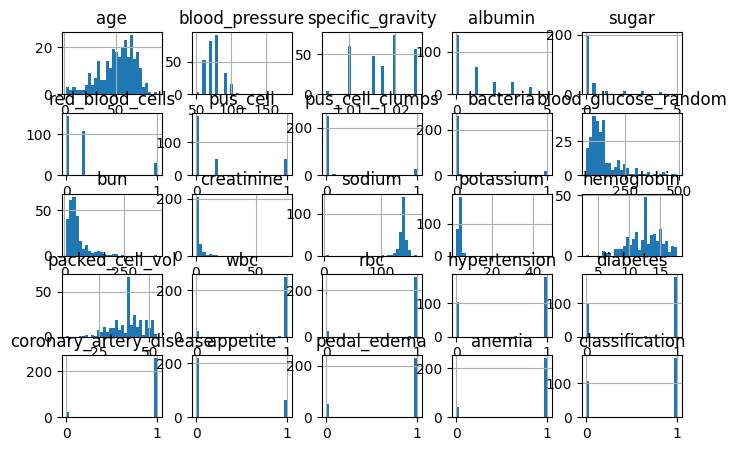

In [ ]:
# check distributions
data_clean_noNAN.hist(bins=30, figsize=(8,5))

In [ ]:
# distribution check shows most are not-normally distriputed ; use non-parametric statistical test

In [ ]:
# review of relationships between variables

In [ ]:
corr_matrix = data_clean_noNAN.corr(method='spearman')

In [ ]:
corr_matrix

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_vol,wbc,rbc,hypertension,diabetes,coronary_artery_disease,appetite,pedal_edema,anemia,classification
age,1.000000,0.119726,-0.241697,0.245464,0.250660,0.191710,0.230013,0.145799,0.019884,0.249156,...,-0.267328,-0.248883,-0.248883,-0.411912,-0.395416,-0.248883,0.162120,-0.131290,-0.075594,0.303853
blood_pressure,0.119726,1.000000,-0.191091,0.149911,0.192412,0.201292,0.136924,0.014706,0.033356,0.163620,...,-0.246688,-0.049440,-0.049440,-0.210467,-0.224300,-0.049440,0.108354,0.037185,-0.200066,0.258430
specific_gravity,-0.241697,-0.191091,1.000000,-0.528187,-0.319712,-0.460241,-0.418652,-0.282078,-0.157821,-0.407601,...,0.625445,0.159667,0.159667,0.420741,0.450487,0.159667,-0.298550,0.281590,0.265185,-0.756420
albumin,0.245464,0.149911,-0.528187,1.000000,0.470806,0.380172,0.575506,0.312923,0.252260,0.424073,...,-0.624313,-0.250064,-0.250064,-0.570801,-0.505280,-0.250064,0.355475,-0.422864,-0.317678,0.695032
sugar,0.250660,0.192412,-0.319712,0.470806,1.000000,0.310458,0.384681,0.092357,0.059416,0.460217,...,-0.344160,-0.259477,-0.259477,-0.422988,-0.590168,-0.259477,0.192137,-0.218518,-0.261172,0.448966
red_blood_cells,0.191710,0.201292,-0.460241,0.380172,0.310458,1.000000,0.356025,-0.019506,0.060664,0.295642,...,-0.449939,-0.171498,-0.171498,-0.321578,-0.354909,-0.171498,0.259418,-0.197137,-0.186586,0.667284
pus_cell,0.230013,0.136924,-0.418652,0.575506,0.384681,0.356025,1.000000,0.322719,0.285542,0.340662,...,-0.486493,-0.238118,-0.238118,-0.420295,-0.412192,-0.238118,0.244379,-0.349786,-0.346489,0.501723
pus_cell_clumps,0.145799,0.014706,-0.282078,0.312923,0.092357,-0.019506,0.322719,1.000000,0.425822,0.209374,...,-0.210734,-0.103773,-0.103773,-0.149842,-0.152720,-0.103773,0.181823,-0.139867,-0.193132,0.183856
bacteria,0.019884,0.033356,-0.157821,0.252260,0.059416,0.060664,0.285542,0.425822,1.000000,0.104866,...,-0.146227,-0.167100,-0.167100,-0.081033,-0.053966,-0.167100,0.156906,-0.160586,-0.047535,0.108598
blood_glucose_random,0.249156,0.163620,-0.407601,0.424073,0.460217,0.295642,0.340662,0.209374,0.104866,1.000000,...,-0.369101,-0.131064,-0.131064,-0.396890,-0.503208,-0.131064,0.272826,-0.156861,-0.192604,0.487024


In [ ]:
# rbc & wbc highly correlated - will not use these to reduce multicolliniarity

In [ ]:
# hemoglobin on class

# separate the data into two groups based on the presence or absence of chronic kidney disease
group1 = data_clean_noNAN[data_clean_noNAN['classification'] == 0]['hemoglobin']
group2 = data_clean_noNAN[data_clean_noNAN['classification'] == 1]['hemoglobin']

# perform the Mann-Whitney U test
u, p = mannwhitneyu(group1, group2)

# results
print("Mann-Whitney U test results:")
print("U = ", u)
print("p-value = ", p)

Mann-Whitney U test results:
U =  17645.5
p-value =  1.0393967717271262e-37


In [ ]:
# packed cell volume on class

# separate the data into two groups based on the presence or absence of chronic kidney disease
group1 = data_clean_noNAN[data_clean_noNAN['classification'] == 0]['packed_cell_vol']
group2 = data_clean_noNAN[data_clean_noNAN['classification'] == 1]['packed_cell_vol']

# perform the Mann-Whitney U test
u, p = mannwhitneyu(group1, group2)

# results
print("Mann-Whitney U test results:")
print("U = ", u)
print("p-value = ", p)

Mann-Whitney U test results:
U =  17504.5
p-value =  1.167989031417161e-36


In [ ]:
# sodium on class

# separate the data into two groups based on the presence or absence of chronic kidney disease
group1 = data_clean_noNAN[data_clean_noNAN['classification'] == 0]['sodium']
group2 = data_clean_noNAN[data_clean_noNAN['classification'] == 1]['sodium']

# perform the Mann-Whitney U test
u, p = mannwhitneyu(group1, group2)

# results
print("Mann-Whitney U test results:")
print("U = ", u)
print("p-value = ", p)

Mann-Whitney U test results:
U =  14192.0
p-value =  2.4616696148691715e-14


In [ ]:
# albumin on class

# separate the data into two groups based on the presence or absence of chronic kidney disease
group1 = data_clean_noNAN[data_clean_noNAN['classification'] == 0]['albumin']
group2 = data_clean_noNAN[data_clean_noNAN['classification'] == 1]['albumin']

# perform the Mann-Whitney U test
u, p = mannwhitneyu(group1, group2)

# results
print("Mann-Whitney U test results:")
print("U = ", u)
print("p-value = ", p)

Mann-Whitney U test results:
U =  2097.0
p-value =  3.730581646203854e-31


In [ ]:
# potassium on class

# separate the data into two groups based on the presence or absence of chronic kidney disease
group1 = data_clean_noNAN[data_clean_noNAN['classification'] == 0]['potassium']
group2 = data_clean_noNAN[data_clean_noNAN['classification'] == 1]['potassium']

# perform the Mann-Whitney U test
u, p = mannwhitneyu(group1, group2)

# results
print("Mann-Whitney U test results:")
print("U = ", u)
print("p-value = ", p)

Mann-Whitney U test results:
U =  8255.0
p-value =  0.13825483722642185


In [ ]:
data1 = data_clean_noNAN['hemoglobin']
data2 = data_clean_noNAN['classification']


from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(data1, data2)
print("Mann-Whitney U test to determine whether the distributions of two independent samples are equal or not")
print("stat=%.3f, p=%.3f" %(stat, p))
if (p > 0.05):
    print("probably the same distribution")
else:
    print("probably different distributions")

Mann-Whitney U test to determine whether the distributions of two independent samples are equal or not
stat=78400.000, p=0.000
probably different distributions


# Logicistic Regression

In [ ]:
# mulitple logisitic regression


formula = 'classification ~ hemoglobin + albumin + packed_cell_vol'
model = smf.glm(formula, data_normalized, family=sm.families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         classification   No. Observations:                  280
Model:                            GLM   Df Residuals:                      276
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -40.532
Date:                Tue, 18 Apr 2023   Deviance:                       81.064
Time:                        22:20:41   Pearson chi2:                     372.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6456
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          19.2810      3.363     